In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Read pharmacy data

gdf = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_pharmacies.geojson")
poland_boundary = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland.country.json")

gdf = gpd.sjoin(gdf, poland_boundary, predicate='within')
gdf = gdf[['id', 'name_left', 'geometry']].rename(columns={'name_left': 'name'}).reset_index(drop=True)
gdf

,id,name,geometry
0,node/201780847,Apteka z uśmiechem,POINT (20.98358 52.20929)
1,node/248566255,Ziko Apteka,POINT (21.05297 52.23803)
2,node/248566269,Dbam o Zdrowie,POINT (21.08214 52.24574)
3,node/260052918,Dbam o Zdrowie,POINT (21.00192 52.20694)
4,node/260458574,Dbam o Zdrowie,POINT (21.04392 52.14537)
...,...,...,...
12481,node/11962211423,Apteka Nova,POINT (21.67419 50.57391)
12482,node/11972219352,None,POINT (20.43455 49.5573)
12483,node/11983600712,Dbam o Zdrowie,POINT (18.94162 50.32028)
12484,node/11986987858,Apteka,POINT (21.11263 52.33182)


<Axes: >

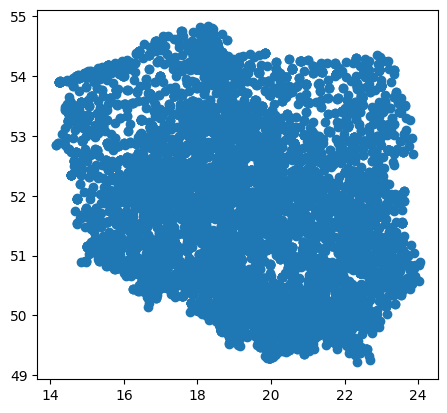

In [3]:
gdf.plot()

In [4]:
# COnvert to local CRS for Poland
gdf = gdf.to_crs('2180')
gdf.crs

<Projected CRS: EPSG:2180>
Name: ETRF2000-PL / CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - onshore and offshore.
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: ETRF2000 Poland
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

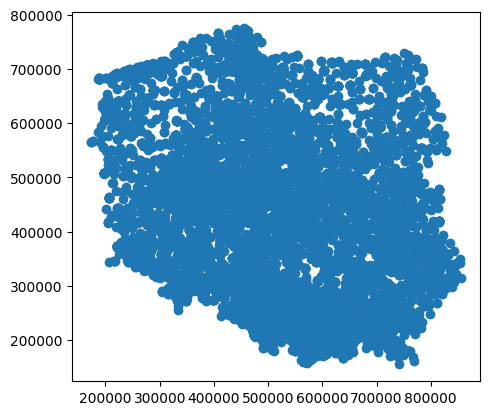

In [5]:
gdf.plot()

In [6]:
gdf2 = gdf.copy()
gdf2['geometry'] = gdf.geometry.buffer(5000)

gdf2

,id,name,geometry
0,node/201780847,Apteka z uśmiechem,"POLYGON ((640490.359 484433.916, 640466.282 48..."
1,node/248566255,Ziko Apteka,"POLYGON ((645139.124 487761.53, 645115.048 487..."
2,node/248566269,Dbam o Zdrowie,"POLYGON ((647105.261 488675.679, 647081.184 48..."
3,node/260052918,Dbam o Zdrowie,"POLYGON ((641750.288 484207.219, 641726.212 48..."
4,node/260458574,Dbam o Zdrowie,"POLYGON ((644811.812 477441.966, 644787.735 47..."
...,...,...,...
12481,node/11962211423,Apteka Nova,"POLYGON ((694290.119 304175.741, 694266.042 30..."
12482,node/11972219352,None,"POLYGON ((608718.116 188752.448, 608694.04 188..."
12483,node/11983600712,Dbam o Zdrowie,"POLYGON ((500844.872 272570.962, 500820.795 27..."
12484,node/11986987858,Apteka,"POLYGON ((648907.086 498305.81, 648883.009 497..."


<Axes: >

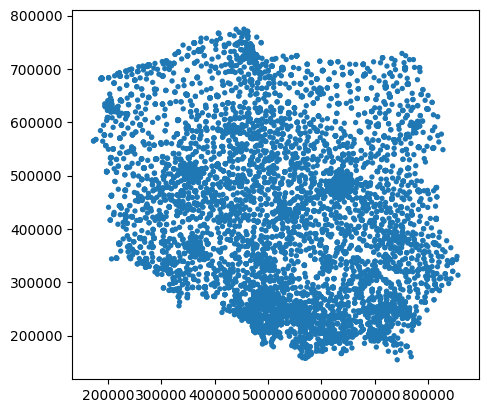

In [7]:
gdf2.plot()

In [8]:
# Convert back to WGS
gdf2 = gdf2.to_crs('4236')

<Axes: >

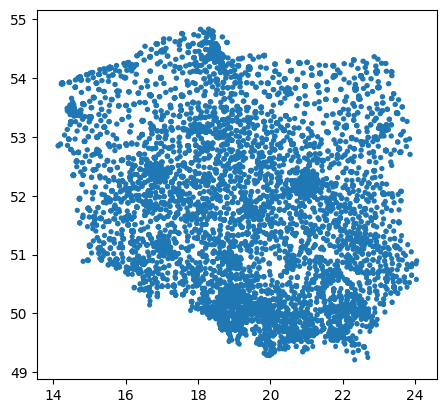

In [9]:
gdf2.plot()

In [10]:
gdf2.to_file("C:/Users/alkaye/geodemographics-demonstrator/processed_data/buffered_pharmacies.geojson")